# Experiment #1: Query Engineering
Started: 2025-01-16

In [1]:
# Only run once, unless restarting kernel
import os
os.chdir('../')
print(os.getcwd())  # Should output the project folder

/home/vlad/Desktop/lmu_bachelor_thesis/code/VariationalInformationPursuit


In [2]:
from torch_geometric.datasets import TUDataset
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

from mutagenicity_dataset import *
from feature_engineering.node_features import *

In [3]:
### LOAD DATASET ###
data_path = './data'
dataset = TUDataset(root=data_path, name='Mutagenicity', transform=get_combined_mapping_transform())

In [4]:
# data = dataset[2]
# g = to_networkx(data, node_attrs=['x'], to_undirected=True)
# nx.draw(g)

# print(data.y.item())
# print(data.x)
# print(data.graph_class_label)
# print(data.node_feature_labels)
# print(data.edge_feature_labels)

## Feature Creation

In [5]:
# Create list of empty feature dictionaries for each data sample
feature_list = []  
for i in range(len(dataset)):
    feature_list.append({})

### Atom Type Count

In [6]:
atom_types = list(get_node_feature_label_mapping().values())

# Create features
count_dict = {}
for atom in atom_types:
    for i, data in enumerate(dataset):
        feature_list[i][f'{atom}_count'] = count_atom_type(data, atom)

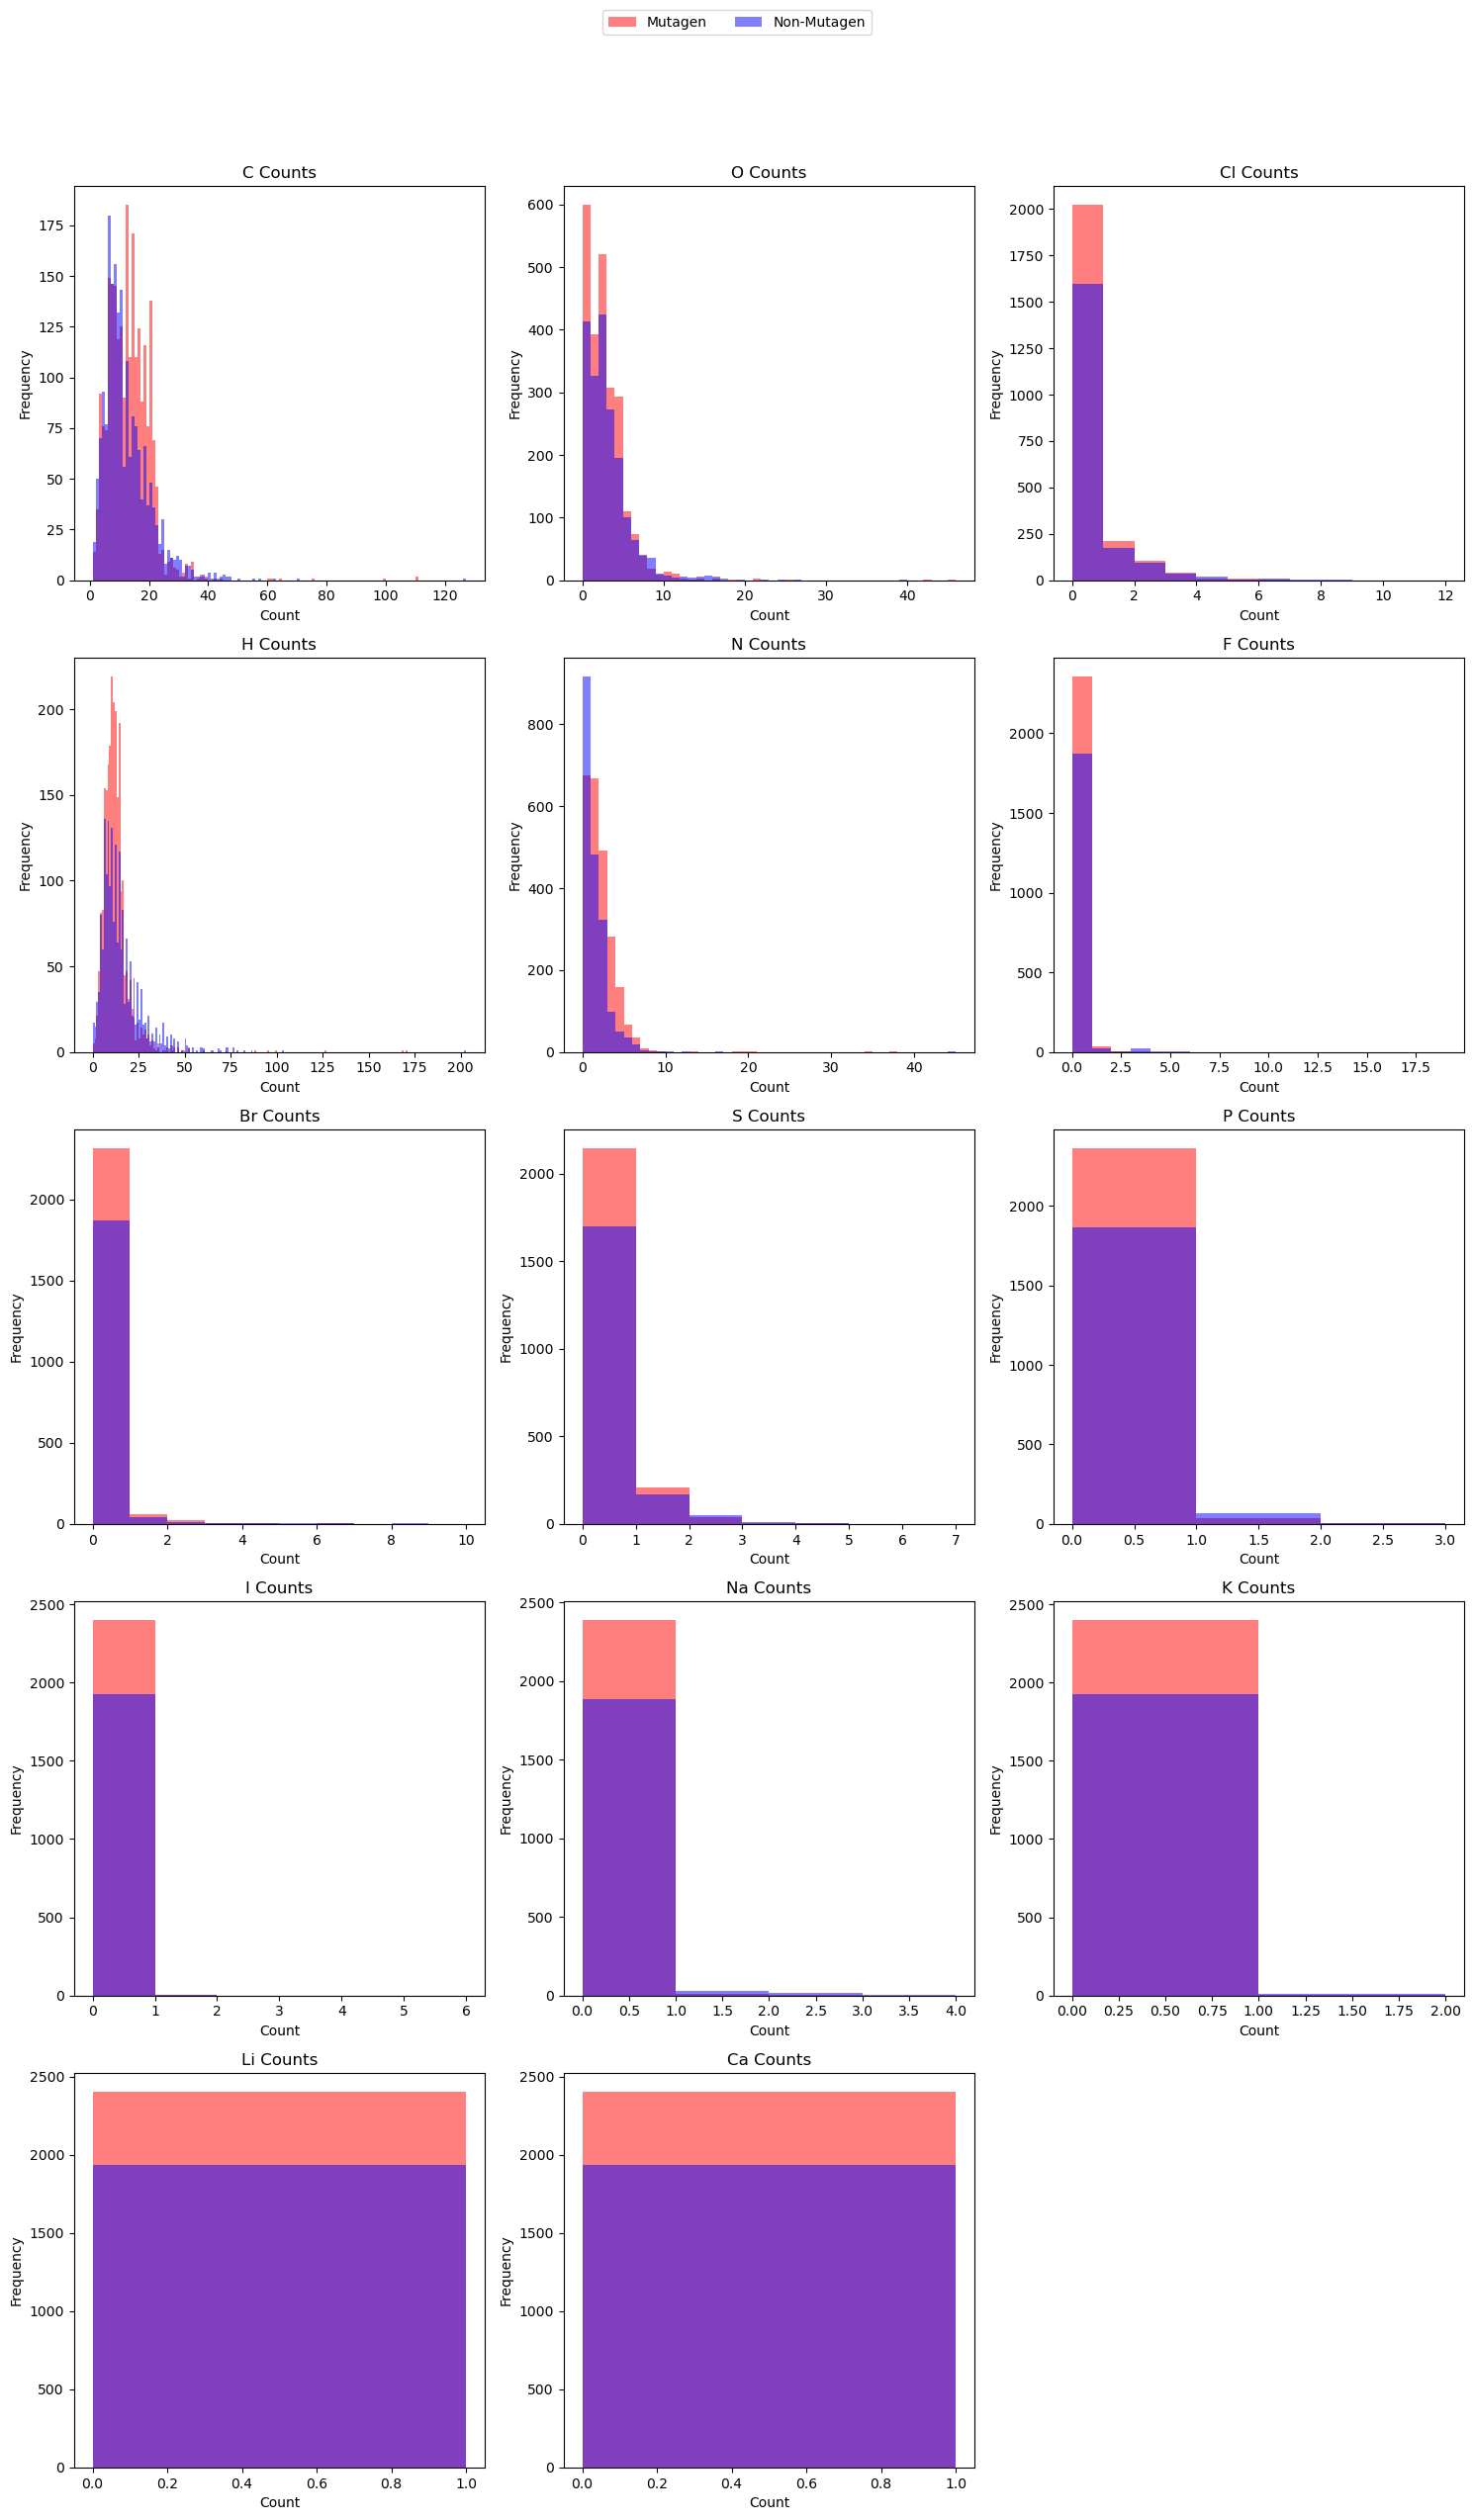

In [9]:
# Visualize features
ncols = 3
nrows = (len(atom_types) // ncols) + ((len(atom_types) % ncols) > 0)
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axs = axs.flatten()

legend_handles = None
legend_labels = None
for idx, atom in enumerate(atom_types):
    mutagen_values = [features[f'{atom}_count'] for i, features in enumerate(feature_list) if is_mutagen(dataset[i])]
    nonmutagen_values = [features[f'{atom}_count'] for i, features in enumerate(feature_list) if not is_mutagen(dataset[i])]
    
    joined = mutagen_values + nonmutagen_values
    min_count = min(joined)
    max_count = max(joined)

    ax = axs[idx]
    ax.hist(mutagen_values, bins=range(min_count, max_count + 1), align='mid', alpha=0.5, label='Mutagen', color='red')
    ax.hist(nonmutagen_values, bins=range(min_count, max_count + 1), align='mid', alpha=0.5, label='Non-Mutagen', color='blue')

    if legend_handles is None and legend_labels is None:
        legend_handles, legend_labels = ax.get_legend_handles_labels()
    
    ax.set_title(f'{atom} Counts')
    ax.set_xlabel(f'Count')
    ax.set_ylabel('Frequency')

# Remove empty subplots if the number of atom types is less than the number of subplot slots
for idx in range(len(atom_types), len(axs)):
    fig.delaxes(axs[idx])

# Add a single legend to the figure
fig.legend(legend_handles, legend_labels, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.02))

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make room for the legend
plt.show()

In [10]:
# fig, axs = plt.subplots(nrows=2, ncols=14, figsize=(50, 6))
# for i, atom in enumerate(node_feature_labels):
#     # mutagen_count_list = count_dict[atom]['mutagen']
#     # nonmutagen_count_list = count_dict[atom]['nonmutagen']
#     # joined = mutagen_count_list + nonmutagen_count_list
#     # min_count = min(joined)
#     # max_count = max(joined)

#     ax = axs[0, i]
#     count_list = count_dict[atom]['mutagen']
#     ax.hist(count_list, bins=range(min(count_list), max(count_list) + 1), align='mid', edgecolor='black')
#     ax.set_title(f'{atom} (mutagen)')
    
#     ax = axs[1, i]
#     count_list = count_dict[atom]['nonmutagen']
#     ax.hist(count_list, bins=range(min(count_list), max(count_list) + 1), align='mid', edgecolor='black')
#     ax.set_title(f'{atom} (nonmutagen)')

### Motif Count